<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-11/week11/CIFAR10_CNN_Lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Arya Fridayana Gastiadi
###1103210082
###Lecture 11 : Image Classification CIFAR10
###Dataset : CIFAR10
###Dokumentasi ChatGPT :https://chatgpt.com/share/5cbb8647-f22d-4345-ab1a-0f79be2c1d96

#Memuat Library

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load dan Preprocess Dataset CIFAR10

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#Explorasi Dataset

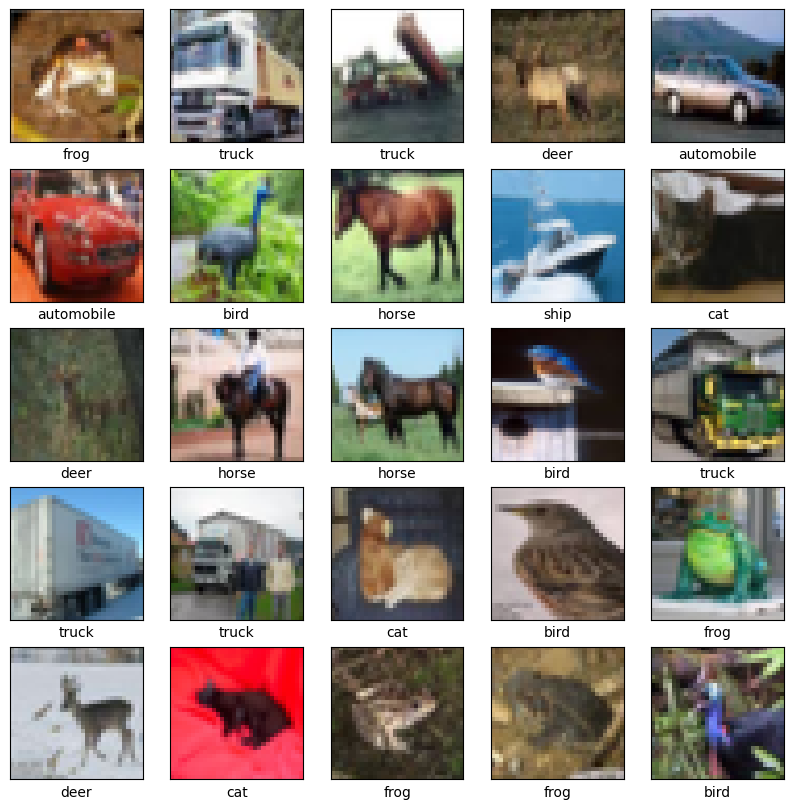

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Membangun Model CNN

##Membangun arsitektur CNN:

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

##Menambahkan lapisan Dense:

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

##Melihat arsitektur model:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

#Melatih Model

##Compile model:

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##Melatih model:

In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 45ms/step - loss: 1.5212 - accuracy: 0.4459 - val_loss: 1.2674 - val_accuracy: 0.5464
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1420 - accuracy: 0.5970 - val_loss: 1.0446 - val_accuracy: 0.6273
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9906 - accuracy: 0.6522 - val_loss: 0.9979 - val_accuracy: 0.6476
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8923 - accuracy: 0.6889 - val_loss: 0.9798 - val_accuracy: 0.6674
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8251 - accuracy: 0.7099 - val_loss: 0.8636 - val_accuracy: 0.6999
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7655 - accuracy: 0.7320 - val_loss: 0.8611 - val_accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7161 - accuracy: 0.7476 - val_loss: 0.8616 -

#Evaluasi Model

##Evaluasi model dengan data uji:

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 4s - loss: 0.8530 - accuracy: 0.7217 - 4s/epoch - 12ms/step

Test accuracy: 0.7217000126838684


#Plot Hasil Pelatihan

##Plot akurasi dan loss selama pelatihan:

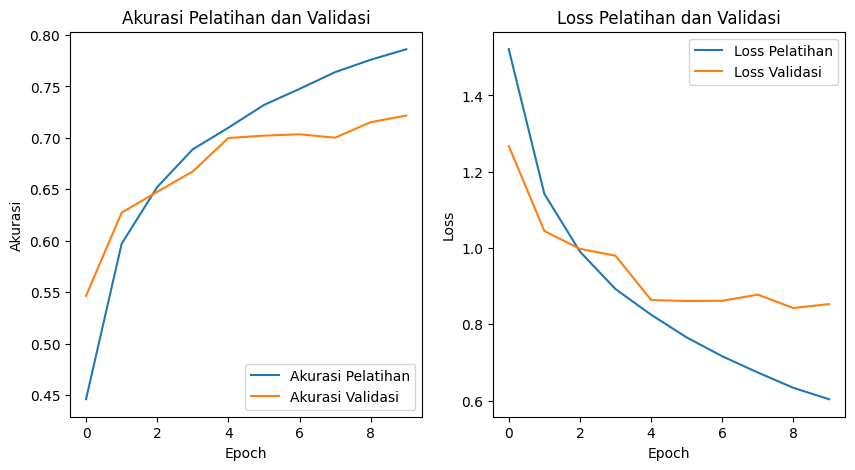

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

#Simpan Model (Opsional)

In [17]:
model.save('cifar10_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Membuat Prediksi

In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 17ms/step


#Fungsi untuk Menampilkan Gambar dengan Prediksi

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label[0]]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

#Menampilkan Hasil Prediksi untuk Beberapa Gambar

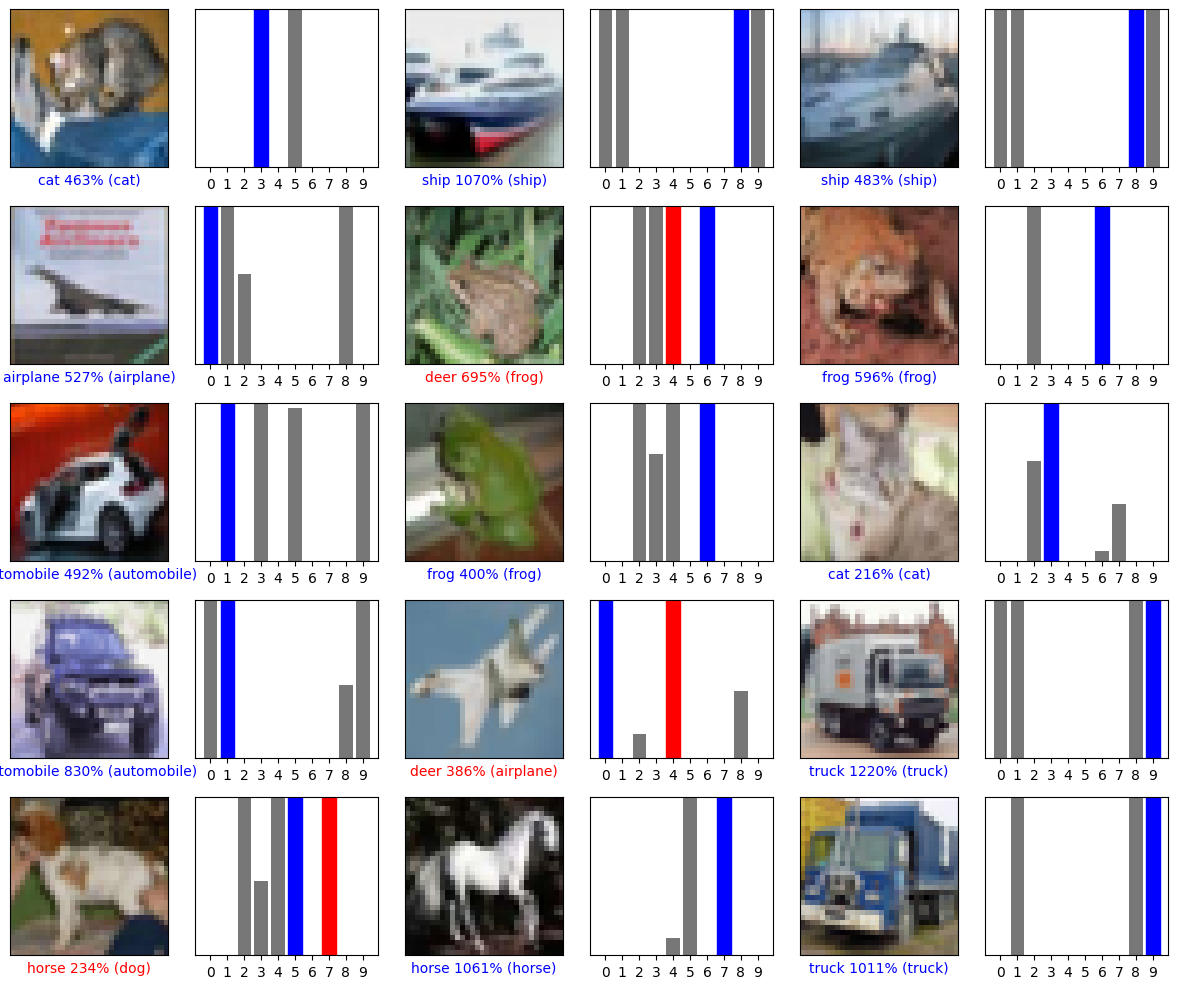

In [20]:
import numpy as np

# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()